In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

In [2]:
# Получить статистику по дням. Просто посчитать число всех событий по дням, 
# число показов, число кликов, число уникальных объявлений и уникальных кампаний.

# Разобраться, почему случился такой скачок 2019-04-05? Каких событий стало больше? 
# У всех объявлений или только у некоторых?

# Найти топ 10 объявлений по CTR за все время. 
# CTR — это отношение всех кликов объявлений к просмотрам. 
# Например, если у объявления было 100 показов и 2 клика, CTR = 0.02. 
# Различается ли средний и медианный CTR объявлений в наших данных?

# Похоже, в наших логах есть баг, объявления приходят с кликами, но без показов! 
# Сколько таких объявлений, есть ли какие-то закономерности? 
# Эта проблема наблюдается на всех платформах?

# Есть ли различия в CTR у объявлений с видео и без? 
# А чему равняется 95 процентиль CTR по всем объявлениям за 2019-04-04?

# Для финансового отчета нужно рассчитать наш заработок по дням. 
# В какой день мы заработали больше всего? В какой меньше? 
# Мы списываем с клиентов деньги, если произошел клик по CPC объявлению, 
# и мы списываем деньги за каждый показ CPM объявления, если у CPM 
# объявления цена - 200 рублей, то за один показ мы зарабатываем 200 / 1000.

# Какая платформа самая популярная для размещения рекламных объявлений? 
# Сколько процентов показов приходится на каждую из платформ (колонка platform)?

# А есть ли такие объявления, по которым сначала произошел клик, а только потом показ?

In [3]:
# date день, в который происходят события
# time точное время события
# event тип события, может быть или показ или клик по рекламе
# platform платформа, на которой произошло рекламное событие
# ad_id id рекламного объявления
# client_union_id id рекламного клиента
# campaign_union_id id рекламной кампании
# ad_cost_type тип объявления с оплатой за клики (CPC) или за показы (CPM)
# ad_cost стоимость объявления в рублях, для CPC объявлений - это цена за клик, для CPM - цена за 1000 показов
# has_video есть ли у рекламного объявления видео
# target_audience_count размер аудитории, на которую таргетируется объявление

In [4]:
ads_data = pd.read_csv('/home/jupyter-v.startu-4/shared/ads_data.csv.zip', compression='zip')

In [5]:
ads_data.head()

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29


In [6]:
ads_data.date = pd.to_datetime(ads_data.date)

In [7]:
datetime.fromtimestamp(1554508770).strftime("%Y-%m-%d %I:%M:%S")

'2019-04-06 01:59:30'

In [8]:
# Создадим колонку, в которой будем хранить не только дату, но и время каждого события 

ads_data['full_date'] = ads_data.time.apply(lambda x: pd.datetime.fromtimestamp(x).strftime("%Y-%m-%d %I:%M:%S"))

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
################################################################################


# Получим статистику по дням. Просто посчитаем число всех событий по дням, 
# число показов, число кликов, число уникальных объявлений и уникальных кампаний.


################################################################################

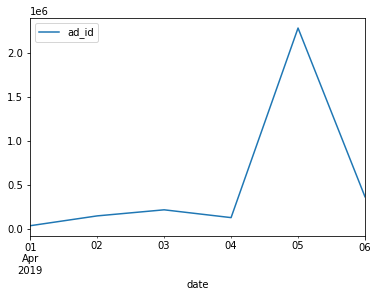

In [10]:
# Посмотрим на график числа объявлений по дням

ads_data\
         .groupby('date')\
         .agg({'ad_id': 'count'}).plot()

In [11]:
# Мы видим скачок 5-ого апреля. Разберёмся: посмотрим на количество event по дням

ads_data\
         .groupby(['date', 'event'], as_index=False)\
         .agg({'ad_id': 'count'})\
         .pivot(index='date', columns='event', values='ad_id').reset_index()
# Действительно, в этот день сравнительно много кликов и показов

event,date,click,view
0,2019-04-01,735,34832
1,2019-04-02,1518,145811
2,2019-04-03,1678,214851
3,2019-04-04,1517,126182
4,2019-04-05,501595,1783288
5,2019-04-06,80420,284287


In [12]:
###################################################################################


# Разобираемся, почему случился такой скачок 2019-04-05? Каких событий стало больше? 
# У всех объявлений или только у некоторых?


###################################################################################

In [13]:
# Выясним, что же повлияло на всплеск наших events 5-ого апреля.
# Найдём количество уникальных рекламных объявлений в каждый из дней

ads_data.drop_duplicates(subset=['ad_id', 'date']).groupby('date').agg({'ad_id': 'count'})

# Или более лаконичным способом:
# ads_data.groupby('date').agg({'ad_id': pd.Series.nunique})

# Ничего необычного:)

,ad_id
date,
2019-04-01,49
2019-04-02,146
2019-04-03,179
2019-04-04,150
2019-04-05,131
2019-04-06,61


In [14]:
# А теперь посмотрим на количество уникальных рекламных кампаний в каждый из дней

ads_data.groupby('date').agg({'campaign_union_id': pd.Series.nunique})

# И тут ничего:)

,campaign_union_id
date,
2019-04-01,49
2019-04-02,146
2019-04-03,177
2019-04-04,147
2019-04-05,130
2019-04-06,60


In [15]:
# Посмотрим на количество events для каждого объявления в этот день(2019-04-05)

ads_data[ads_data.date == '2019-04-05']\
                                       .ad_id.value_counts()

# Видим, что рекламное объявление с ad_id = 112583 гораздо чаще, чем другие
# кликалось и просматривалось 5 апреля.

112583    2166611
29927       27186
44635        8268
46583        7327
44956        5656
           ...   
46433          17
46024          16
21405          16
113867         15
111067         14
Name: ad_id, Length: 131, dtype: int64

In [16]:
# Посмотрим на это объявление в разные дни 

ads_data.query('ad_id == 112583').groupby('date').agg({'time': 'count'})

# Судя по результату, это какая-то крупная рекламная кампания. Ничего необычного. Побольше бы таких:)

,time
date,
2019-04-05,2166611
2019-04-06,348613


In [17]:
# Посмотрим на данные по этому объявлению

ads_data.query('ad_id == 112583').head()

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
527124,112583,1554480636,view,2019-04-05,CPM,0,111818,112260,web,199.4,239408,4355,2019-04-05 06:10:36
527125,112583,1554480636,click,2019-04-05,CPM,0,111818,112260,android,199.4,239408,6243,2019-04-05 06:10:36
527126,112583,1554480636,view,2019-04-05,CPM,0,111818,112260,android,199.4,239408,2470,2019-04-05 06:10:36
527127,112583,1554480636,view,2019-04-05,CPM,0,111818,112260,web,199.4,239408,5435,2019-04-05 06:10:36
527128,112583,1554480636,view,2019-04-05,CPM,0,111818,112260,android,199.4,239408,6092,2019-04-05 06:10:36


In [18]:
####################################################################


# Найти топ 10 объявлений по CTR за все время. 
# CTR — это отношение всех кликов объявлений к просмотрам. 
# Например, если у объявления было 100 показов и 2 клика, CTR = 0.02. 
# Различается ли средний и медианный CTR объявлений в наших данных?


####################################################################

In [19]:
# Создадим датафрейм ads_CTR, сохранив в него количество кликов и просмотров
# для каждого объявления

ads_CTR = ads_data\
                     .groupby(['ad_id', 'event'], as_index=False)\
                     .agg({'time': 'count'})\
                     .pivot(index='ad_id', columns='event', values='time').reset_index()

In [20]:
# Наш ads_CTR

ads_CTR

event,ad_id,click,view
0,3,9.0,490.0
1,2132,1.0,95.0
2,2276,2.0,1454.0
3,2475,NaN,132.0
4,2643,3.0,286.0
...,...,...,...
350,121941,1.0,640.0
351,121943,15.0,1722.0
352,122042,1.0,155.0
353,122063,1.0,260.0


In [21]:
# Создадим непосредственно колонку ctr

ads_CTR = ads_CTR.assign(ctr = ads_CTR.click / ads_CTR.view)

In [22]:
# Найдём ТОР-10 объявлений по значению ctr

ads_CTR.sort_values('ctr', ascending=False).head(10)

event,ad_id,click,view,ctr
289,112583,580436.0,1934788.0,0.300000
324,119450,258.0,1254.0,0.205742
125,38575,43.0,257.0,0.167315
144,40968,29.0,217.0,0.133641
207,45642,42.0,344.0,0.122093
283,110924,11.0,95.0,0.115789
194,45043,28.0,245.0,0.114286
96,35034,112.0,997.0,0.112337
5,4585,53.0,476.0,0.111345
328,120347,236.0,2168.0,0.108856


In [23]:
# Посмотрим, различаются ли средний и медианный ctr

ads_CTR.ctr.describe()

# Средний - mean - 0.020628
# Медианный - 50%  -  0.010753
# В 2 раза средний выше, медианный(поэтому средний лучше не использовать)

count    306.000000
mean       0.020628
std        0.030360
min        0.000451
25%        0.005943
50%        0.010753
75%        0.024072
max        0.300000
Name: ctr, dtype: float64

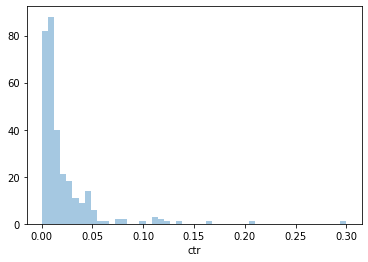

In [24]:
# Посмотрим на распределение наших ctr

sns.distplot(ads_CTR.ctr, kde=False)

In [25]:
################################################################################

# Похоже, в наших логах есть баг, объявления приходят с кликами, но без показов! 
# Сколько таких объявлений, есть ли какие-то закономерности? 
# Эта проблема наблюдается на всех платформах?

################################################################################

In [26]:
# Заполним отсутствующие значения кликов на 0

ads_CTR = ads_CTR.fillna(0)

In [27]:
# Сохраним все объявления(ad_id) в новую серию ads_ids_bug

ads_ids_bug = ads_CTR.query('click == 0').ad_id

In [28]:
# А теперь посмотрим, на каких платформах баг встречается чаще 

ads_data[ads_data.ad_id.isin(ads_ids_bug)]\
                                            .groupby('platform', as_index=False)\
                                            .agg({'ad_id': 'count'})\
                                            .sort_values('ad_id')

# Android...

,platform,ad_id
2,web,1988
1,ios,3075
0,android,4906


In [29]:
# Но можно ли говорить о том, что вина в этом самого Android?
# Посмотрим на распределение всех объявлений по платформам

ads_data\
        .groupby('platform', as_index=False)\
        .agg({'ad_id': 'count'})\
        .sort_values('ad_id')
# Androida значительно больше, чем ios и web, поэтому однозначно сказать нельзя, есть ли проблемы с андроидом

,platform,ad_id
2,web,635425
1,ios,953078
0,android,1588211


In [30]:
#######################################################################

# Есть ли различия в CTR у объявлений с видео и без? 
# А чему равняется 95 процентиль CTR по всем объявлениям за 2019-04-04?

#######################################################################

In [31]:
ads_CTR[ads_CTR.view != 0].ctr.describe()    # С видео

count    346.000000
mean       0.018243
std        0.029300
min        0.000000
25%        0.003128
50%        0.009526
75%        0.021544
max        0.300000
Name: ctr, dtype: float64

In [32]:
ads_CTR[ads_CTR.view == 0].ctr.describe()    # Без видео

count    9.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: ctr, dtype: float64

In [33]:
# Получим данные за 4 апреля

df_2019_04_04 = ads_data[ads_data.date == '2019-04-04']\
         .groupby(['ad_id', 'event'], as_index=False)\
         .agg({'time': 'count'})\
         .pivot(index='ad_id', columns='event', values='time').reset_index().fillna(0)

In [34]:
df_2019_04_04 = df_2019_04_04.assign(ctr = df_2019_04_04.click / df_2019_04_04.view)

In [35]:
############################################################################

# Для финансового отчета нужно рассчитать наш заработок по дням. 
# В какой день мы заработали больше всего? В какой меньше? 
# Мы списываем с клиентов деньги, если произошел клик по CPC объявлению, 
# и мы списываем деньги за каждый показ CPM объявления, если у CPM 
# объявления цена - 200 рублей, то за один показ мы зарабатываем 200 / 1000.

############################################################################

In [36]:
# Посчитаем сумму для кликов и просмотров

clicks = ads_data[(ads_data.ad_cost_type == 'CPC') & (ads_data.event == 'click')].ad_cost.sum()
views = ads_data[(ads_data.ad_cost_type == 'CPM') & (ads_data.event == 'view')].ad_cost.sum()

In [37]:
# А теперь узнаем, сколько заработали всего:

((clicks + views)/1000).round(2)

497175.49

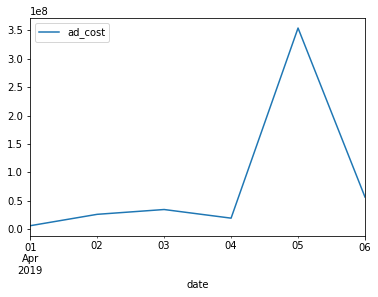

In [38]:
# А теперь узнаем, сколько заработали по дням:

ads_data.query('(ad_cost_type == "CPC" and event == "click") or \
                (ad_cost_type == "CPM" and event == "view")')\
                .groupby('date')\
                .agg({'ad_cost': 'sum'})\
                .plot()

# Как и ожидалось, когда был всплеск просмотров и кликов, тогда был и 'всплеск' денег:)

In [39]:
# Какая платформа самая популярная для размещения рекламных объявлений? 
# Сколько процентов показов приходится на каждую из платформ (колонка platform)?
# Узнаем. Создадим новый датафрейм wia (W_eb__I_os__A_ndroid)

wia = ads_data\
        .groupby('platform', as_index=False)\
        .agg({'ad_id': 'count'})\
        .sort_values('ad_id')                 

In [40]:
wia

,platform,ad_id
2,web,635425
1,ios,953078
0,android,1588211


In [41]:
# Создадим новую колонку, куда запишем процент объявлений для каждой
# платформы от их(объявлений) общего числа

wia = wia.assign(pp = (wia.ad_id / wia.ad_id.sum() * 100).round(2))

In [42]:
# Вот так ровненько распределились проценты:)

wia

,platform,ad_id,pp
2,web,635425,20.0
1,ios,953078,30.0
0,android,1588211,50.0


In [43]:
# А есть ли такие объявления, по которым сначала произошел клик, а только потом показ?

In [44]:

ads_data.groupby(['ad_id', 'event'], as_index=False)\
        .agg({'time': 'min'})\
        .pivot(index='ad_id', columns='event', values='time')\
        .query('click < view')

event,click,view
ad_id,,
16548,1.554336e+09,1.554336e+09
30939,1.554165e+09,1.554173e+09
40464,1.554164e+09,1.554164e+09
42007,1.554423e+09,1.554423e+09
44543,1.554336e+09,1.554337e+09
45436,1.554336e+09,1.554336e+09
119450,1.554336e+09,1.554336e+09


In [45]:
#  Такие объявления есть и это явный баг. Будем разбираться.